# Board Game Review Prediction

conda install -c anaconda git

git clone https://github.com/ThaWeatherman/scrapers.git

### 1. Importing Libraries and Loading the Data

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


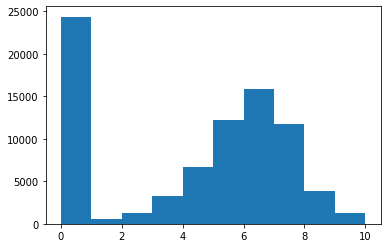

In [6]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read in the data.
games = pandas.read_csv("games.csv.txt")
# Print the names of the columns in games.
print(games.columns)
print(games.shape)

# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

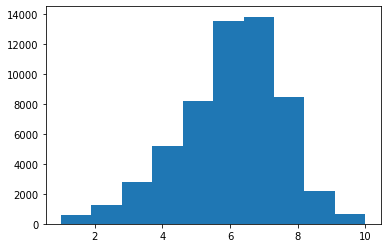

In [7]:
# games[games["average_rating"] == 0]

# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
print(games[games["average_rating"] == 0].iloc[0])
# Print the first row of all the games with scores greater than 0.
print(games[games["average_rating"] > 0].iloc[0])

# Remove any rows without user reviews.
games = games[games["users_rated"] > 0]
# Remove any rows with missing values.
games = games.dropna(axis=0)

# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

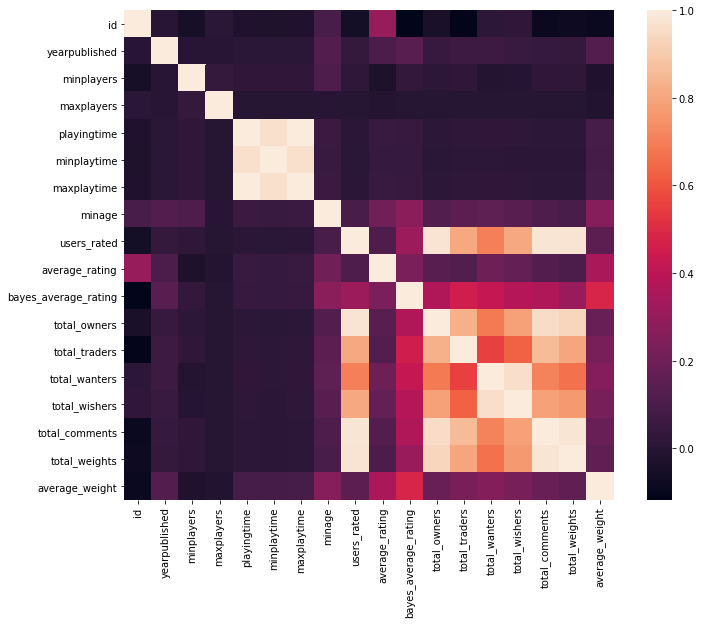

In [23]:
#correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

In [9]:
# Get all the columns from the dataframe.
columns = games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

# Store the variable we'll be predicting on.
target = "average_rating"

### 2. Linear Regression and random forest model

In the following cells, we will deploy a simple linear regression model to predict the average review of each board game.  We will use the mean squared error as a performance metric.  Furthermore, we will compare and contrast these results with the performance of an ensemble method. 

In [10]:
# Import a convenience function to split the sets.
from sklearn.model_selection import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = games.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = games.loc[~games.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [11]:
# Import the linear regression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

2.0788190326293234

In [12]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
mean_squared_error(predictions, test[target])

1.4458560046071653

In [14]:
games

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81260,184187,boardgameexpansion,Rum & Bones: Skullkicker heroes,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.00000,0.00000,16,0,0,1,2,1,1.0000
81261,184189,boardgameexpansion,Rum & Bones: Luck Goddesses,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.00000,0.00000,19,0,0,1,2,1,1.0000
81263,184195,boardgameexpansion,Rum & Bones: Mercenary Tide Deck,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.00000,0.00000,22,0,0,0,2,1,1.0000
81278,184258,boardgame,Rocket Shogi,2012.0,2.0,2.0,0.0,10.0,0.0,8.0,1,7.00000,0.00000,0,0,0,0,1,0,0.0000
